In [12]:
import pandas as pd
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
data = {
    "text": [
        "I love this product! It's fantastic.",
        "Worst purchase ever. Completely useless!",
        "It's okay, not too bad but not great either.",
        "Absolutely wonderful experience.",
        "The service was terrible and slow.",
        "I’m feeling excited about this!",
        "This news makes me really sad.",
        "I am angry and frustrated with this result."
    ]
}
df = pd.DataFrame(data)

In [9]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["text"].apply(get_sentiment)

In [13]:
emotion_lexicon = {
    "happy": "joy", "love": "joy", "excited": "joy",
    "angry": "anger", "frustrated": "anger",
    "sad": "sadness", "depressed": "sadness",
    "terrible": "disgust", "worst": "disgust"
}

def detect_emotion(text):
    tokens = nltk.word_tokenize(text.lower())
    for word in tokens:
        if word in emotion_lexicon:
            return emotion_lexicon[word]
    return "neutral"

df["Emotion"] = df["text"].apply(detect_emotion)

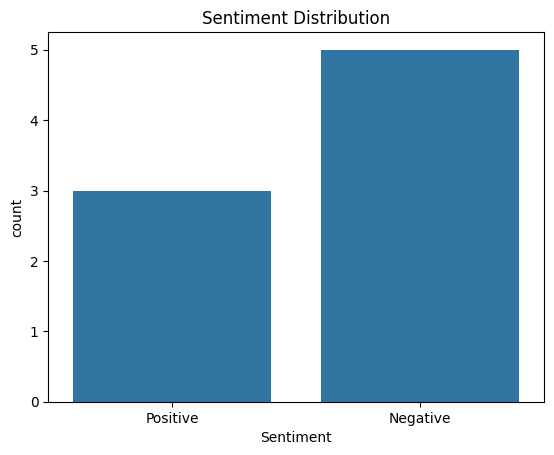

In [14]:
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

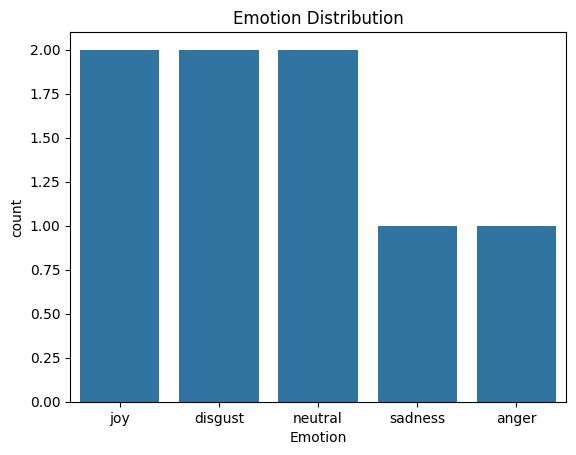

In [15]:
sns.countplot(x="Emotion", data=df)
plt.title("Emotion Distribution")
plt.show()

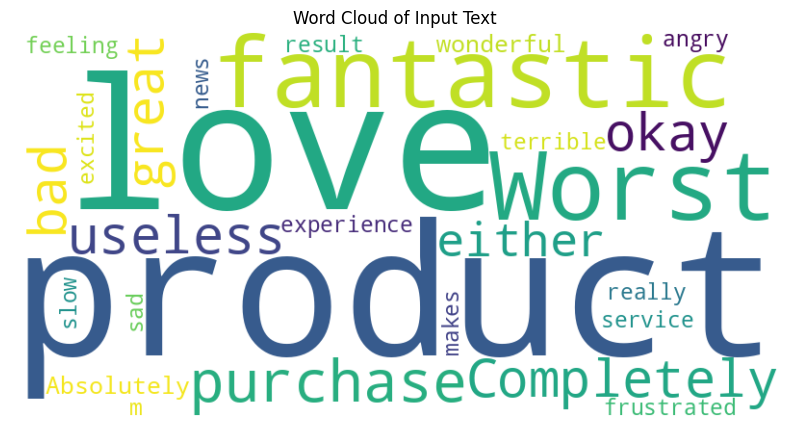

In [16]:
all_words = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Input Text")
plt.show()